In [ ]:
import pandas as pd
df = pd.read_csv("/content/bank.csv")
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import plot_model

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# term_deposits = pd.read_csv('your_dataset.csv')

# Define features and target variable
X = term_deposits.drop(['deposit'], axis=1)
y = term_deposits['deposit']

# Define columns to scale and one-hot encode
numeric_features = ["age", "balance", "day", "campaign", "pdays", "previous", "duration"]
categorical_features = ["job", "education", "marital", "default", "housing", "loan", "contact", "month", "poutcome"]

# Apply StandardScaler to selected numeric columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Apply OneHotEncoder to selected categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cols = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_features))
X = pd.concat([X.drop(categorical_features, axis=1), encoded_df], axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
    keras.layers.Dense(128, activation='relu'),      # Hidden layer with 128 units and ReLU activation
    keras.layers.Dense(64, activation='relu'),       # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')      # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualize the model architecture and save it to a file (e.g., 'model.png')
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.2%}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
280/280 [==============================] - 2s 4ms/step - loss: 0.4306 - accuracy: 0.8075 - val_loss: 0.3715 - val_accuracy: 0.8392
Epoch 2/10
280/280 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8438 - val_loss: 0.3579 - val_accuracy: 0.8468
Epoch 3/10
280/280 [==============================] - 1s 3ms/step - loss: 0.3473 - accuracy: 0.8517 - val_loss: 0.3506 - val_accuracy: 0.8513
Epoch 4/10
280/280 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8597 - val_loss: 0.3464 - val_accuracy: 0.8554
Epoch 5/10
280/280 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.8621 - val_loss: 0.3514 - val_accuracy: 0.8576
Epoch 6/10
280/280 [==============================] - 1s 3ms/step - loss: 0.3156 - accuracy: 0.8668 - val_loss: 0.3468 - val_accuracy: 0.8562
Epoch 7/10
280/280 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8714 - val_loss: 0.3452 - val_accuracy: 0.8585
Epoch 

In [ ]:
# Access the weights of the input layer
input_layer_weights = model.layers[0].get_weights()[0]

# Calculate feature importance scores by taking the absolute sum of weights for each feature
feature_importance_scores = np.abs(input_layer_weights).sum(axis=1)

# Create a DataFrame to associate feature names with importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_scores
})

# Sort the features by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance scores
print(feature_importance_df)


                Feature  Importance
45            month_oct   20.220171
35            month_apr   20.014923
38            month_feb   19.929583
3              duration   19.361752
39            month_jan   19.122311
44            month_nov   18.364321
41            month_jun   17.987885
42            month_mar   17.527918
34      contact_unknown   17.390314
36            month_aug   17.059694
37            month_dec   16.873358
40            month_jul   16.715631
43            month_may   16.174814
2                   day   16.126097
18          job_unknown   15.304655
47     poutcome_failure   15.209069
46            month_sep   15.040733
4              campaign   14.965503
48       poutcome_other   14.526700
49     poutcome_success   14.414135
12          job_retired   14.219795
10        job_housemaid   14.143665
27          default_yes   14.090714
9      job_entrepreneur   14.081716
33    contact_telephone   14.074413
7            job_admin.   14.028709
15          job_student   13

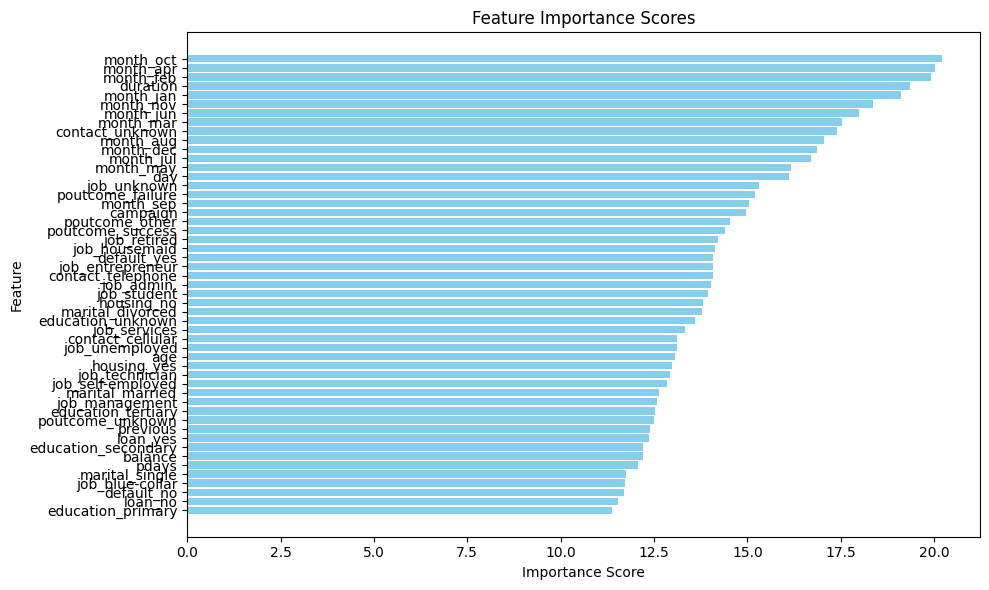

In [ ]:
import matplotlib.pyplot as plt

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.tight_layout()

# Show the plot
plt.show()


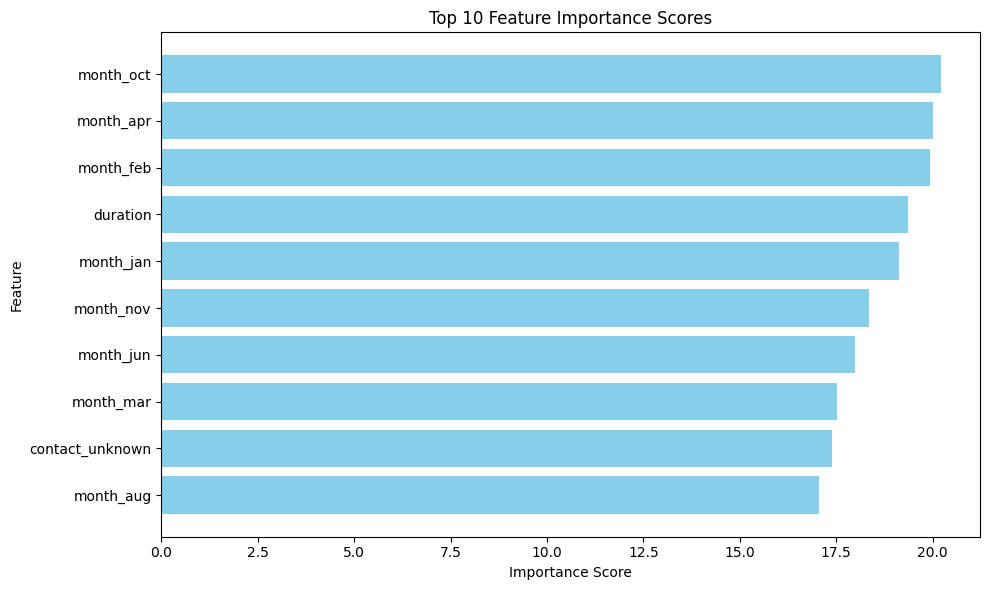

In [ ]:
# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N features to display
top_n = 10  # Change this value to the desired number of top features
top_features = feature_importance_df.head(top_n)

# Create a horizontal bar graph for the top N features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance Scores'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.tight_layout()

# Show the plot
plt.show()
